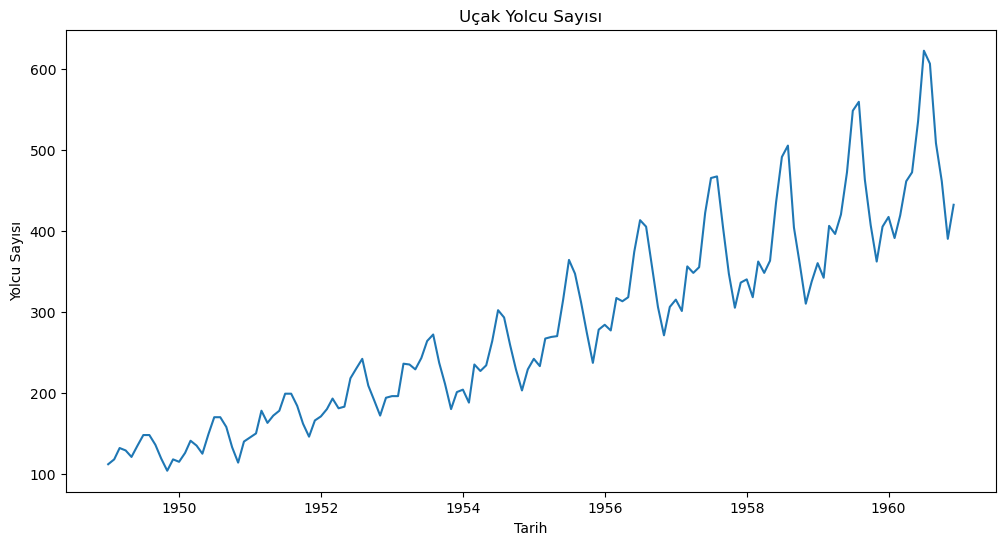

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükleme (örneğin, bir CSV dosyasından)
data = pd.read_csv('AirPassengers.csv')  # Uçak yolcu sayısı verisi
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Veriyi görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(data['#Passengers'])
plt.title('Uçak Yolcu Sayısı')
plt.xlabel('Tarih')
plt.ylabel('Yolcu Sayısı')
plt.show()

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Veriyi normalize et
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Eğitim ve test setleri
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

In [3]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12  # Son 12 ay
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Veriyi LSTM giriş formatına dönüştür
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Modeli oluştur
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğit
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0664
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0140
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [5]:
# Eğitim ve test tahminlerini yapma
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Tahminleri ters ölçeklendirme
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

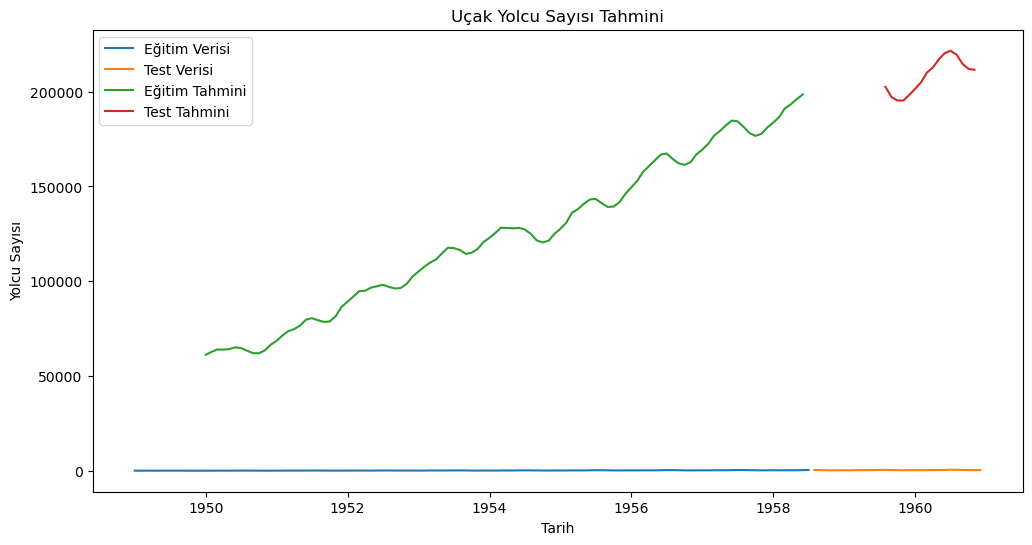

In [6]:
# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(data.index[:train_size], data['#Passengers'][:train_size], label='Eğitim Verisi')
plt.plot(data.index[train_size:], data['#Passengers'][train_size:], label='Test Verisi')

# Eğitim tahminini çizme
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Test tahminini çizme
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

plt.plot(data.index, scaler.inverse_transform(train_predict_plot), label='Eğitim Tahmini')
plt.plot(data.index, scaler.inverse_transform(test_predict_plot), label='Test Tahmini')

plt.title('Uçak Yolcu Sayısı Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Yolcu Sayısı')
plt.legend()
plt.show()